<a href="https://colab.research.google.com/github/IntroComputationalPhysics-UNT/period-and-revolution-time-rigid-pendulum-EarthPurse/blob/main/solve_ivp_events_and_quad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Pseudocode
# Define the Rigid Pendulum Ordinary Differential Equation (ODE)
#FUNCTION rigid_pendulum_ode(t, y, omega_0):
  #theta, ang_vel = y
  #dtheta_dt = ang_vel
  #d2theta_dt2 = -omega_0^2 * sin(theta)
  #RETURN [dtheta_dt, d2theta_dt2]

# Define functions for numerical integration (quad) and ODE solver (solve_ivp)
#FUNCTION compute_period_integral(theta_0, omega_0):
  # Integrand for period
  #FUNCTION period_integrand(theta, theta_0, omega_0):
    #3RETURN 1 / sqrt(cos(theta) - cos(theta_0))
  #period, _ = quad(period_integrand, 0, theta_0, args=(theta_0, omega_0))
  #RETURN 4 * period / (sqrt(2) * omega_0)

#FUNCTION compute_revolution_integral(theta_0, omega_0):
  #E = cos(theta_0)
  # Integrand for revolution time
  #FUNCTION revolution_integrand(theta, E, omega_0):
    #RETURN 1 / sqrt(1 - (E - cos(theta)))
  #rev, _ = quad(revolution_integrand, 0, 2*pi, args=(E, omega_0))
  #RETURN rev / omega_0

#FUNCTION compute_period_ode(theta_0, ang_vel_0, omega_0):
  #y0 = [theta_0, ang_vel_0]
  #sol = solve_ivp(rigid_pendulum_ode, [0, 50], y0, events=event_peak, args=(omega_0,))
  #IF sol.t_events[0] HAS elements:
    #RETURN 2 * sol.t_events[0][0]
  #ELSE:
    #RETURN None

#FUNCTION compute_revolution_ode(theta_0, ang_vel_0, omega_0):
  # y0 = [0, ang_vel_0] sol = solve_ivp(rigid_pendulum_ode, [0, 50], y0,
# events=event_revolution, args=(omega_0,)) IF sol.t_events[0] HAS elements:
# RETURN sol.t_events[0][0] ELSE: RETURN None

# Main execution
#SET omega_0 = 1
#GENERATE ang_vel_list from 0.5 to 5 with 20 points
#INITIALIZE T_int_list, T_rev_int_list, T_ode_list, T_rev_ode_list as empty lists

#FOR each ang_vel in ang_vel_list:
  #SET theta_0 = 0
  #T_int = compute_period_integral(theta_0, omega_0)
  #T_rev_int = compute_revolution_integral(theta_0, omega_0)
  #T_ode = compute_period_ode(theta_0, ang_vel, omega_0)
  #T_rev_ode = compute_revolution_ode(theta_0, ang_vel, omega_0)
  #ADD T_int to T_int_list
  #ADD T_rev_int to T_rev_int_list
  #ADD T_ode to T_ode_list
  #ADD T_rev_ode to T_rev_ode_list

# Plotting
#REATE new figure
#PLOT ang_vel_list vs T_int_list with label 'Period (Integral)'
#PLOT ang_vel_list vs T_ode_list with label 'Period (ODE)'
#PLOT ang_vel_list vs T_rev_int_list with label 'Revolution (Integral)'
#PLOT ang_vel_list vs T_rev_ode_list with label 'Revolution (ODE)'
#SET xlabel='Initial angular velocity', ylabel='Time'
#SET title='Period vs Revolution Time'
#DISPLAY plot

/tmp/ipython-input-701730141.py:55: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 / np.sqrt(np.cos(theta) - np.cos(theta_0))
/tmp/ipython-input-701730141.py:56: IntegrationWarning: Extremely bad integrand behavior occurs at some points of the
  integration interval.
  period, _ = quad(period_integrand, 0 ,theta_0, args=(theta_0, omega_0))
/tmp/ipython-input-701730141.py:64: RuntimeWarning: invalid value encountered in sqrt
  return 1 / np.sqrt(1 - (E - np.cos(theta)))
/tmp/ipython-input-701730141.py:65: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  rev, _ 

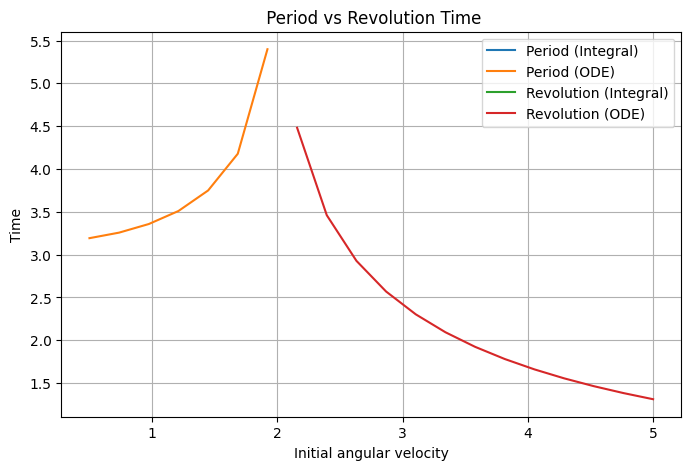

In [1]:
from re import A
from typing_extensions import TypeVarTuple
# import modules
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp, quad

# define the regid pendulum ODE
def rigid_pendulum_ode (t, y, omega_0=1):
  """
  y = [theta, ang_vel]
  """
  theta, ang_vel = y
  dtheta_dt = ang_vel
  d2theta_dt2 = -omega_0**2 * np.sin(theta)
  return [dtheta_dt, d2theta_dt2]

# define revolution time and period
def period (theta, theta_0, omega_0=1):
  coeff = 4 / (np.sqrt(2) * omega_0)
  denom = np.sqrt(np.cos(theta) - np.cos(theta_0))
  return coeff / denom

def revolution_time (theta, E, omega_0=1):
  """
  Revolutioon time integral (full 2π sweep)
  """
  coeff =1 / omega_0
  denom = np.sqrt(1 - (E - np.cos(theta)))
  return coeff / denom

# functions for solve_ivp
def event_peak(t, y, *args):
  return y[1]
event_peak.direction = -1
event_peak.terminal = True

def event_revolution (t, y, *args):
  return y[0] - 2*np.pi
event_revolution.direction = 1
event_revolution.terminal = True

# plotting
def basic_plot(x, y, xlabel=None, ylabel=None, label=None):
  plt.plot(x, y, label=label)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.legend()
  plt.grid(True)

# now usiing "quad" integral method
def compute_period_integral(theta_0, omega_0=1):
  # Need to define period_integrand first
  def period_integrand(theta, theta_0, omega_0):
      return 1 / np.sqrt(np.cos(theta) - np.cos(theta_0))
  period, _ = quad(period_integrand, 0 ,theta_0, args=(theta_0, omega_0))
  return 4 * period / (np.sqrt(2) * omega_0)


def compute_revolution_integral(theta_0, omega_0=1):
  E = np.cos(theta_0)
  # Need to define revolution_integrand first
  def revolution_integrand(theta, E, omega_0):
      return 1 / np.sqrt(1 - (E - np.cos(theta)))
  rev, _ = quad(revolution_integrand, 0, 2*np.pi, args=(E, omega_0))
  return rev / omega_0

# now using "solve_ivp + events"
def compute_period_ode(theta_0, ang_vel_0, omega_0=1):
  y0 = [theta_0, ang_vel_0]
  sol = solve_ivp(rigid_pendulum_ode, [0, 50], y0,
                  args=(omega_0,), events=event_peak, max_step=0.01)
  if sol.t_events[0].size > 0:
    # The period is the time to reach the peak from the start, multiplied by 2 (for a full oscillation)
    return 2 * sol.t_events[0][0]
  else:
    return None

def compute_revolution_ode(theta_0, ang_vel_0, omega_0=1):
  y0 = [0, ang_vel_0]
  sol = solve_ivp(rigid_pendulum_ode, [0, 50], y0,
                  args=(omega_0,), events=event_revolution, max_step=0.01)
  if sol.t_events[0].size > 0:
    return sol.t_events[0][0]
  else:
    return None

#velocities
omega_0 = 1
ang_vel_list = np.linspace(0.5, 5, 20)
T_int_list = []
T_rev_int_list = []
T_ode_list = []
T_rev_ode_list = []

for ang_vel in ang_vel_list:
    theta_0 = 0
    T_int = compute_period_integral(theta_0, omega_0)
    T_rev_int = compute_revolution_integral(theta_0, omega_0)
    T_ode = compute_period_ode(theta_0, ang_vel, omega_0)
    T_rev_ode = compute_revolution_ode(theta_0, ang_vel, omega_0)
    T_int_list.append(T_int)
    T_rev_int_list.append(T_rev_int)
    T_ode_list.append(T_ode)
    T_rev_ode_list.append(T_rev_ode)

# Plot
plt.figure(figsize=(8,5))
basic_plot(ang_vel_list, T_int_list, xlabel='Initial angular velocity', ylabel='Time', label='Period (Integral)')
basic_plot(ang_vel_list, T_ode_list, xlabel='Initial angular velocity', ylabel='Time', label='Period (ODE)')
basic_plot(ang_vel_list, T_rev_int_list, xlabel='Initial angular velocity', ylabel='Time', label='Revolution (Integral)')
basic_plot(ang_vel_list, T_rev_ode_list, xlabel='Initial angular velocity', ylabel='Time', label='Revolution (ODE)')
plt.title(" Period vs Revolution Time")
plt.show()